In [1]:
import pandas as pd

from sklearn.cluster import KMeans

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def get_optimal_cluster_count(working_arr, working_label, m_threshold=2.):
    clusters= [i for i in xrange(1,11)]
    print("testing clusters: {} for {}".format(clusters, working_label))

    n_jobs= -2
    random_state=47
    max_iter=100

    error= np.zeros(len(clusters))

    for i in xrange(0, len(clusters)):
        kmeans= KMeans(n_clusters=clusters[i], n_jobs=n_jobs, max_iter=max_iter, random_state=random_state)
        print("Executing kmeans: {}".format(kmeans))

        kmeans.fit(working_arr)

        error[i]= kmeans.inertia_
    
    fig, ax= plt.subplots(figsize=(16,8))
    ax.plot(error)
    
    we= np.divide(error, math.pow(10,11))
    error_diff= np.abs(np.diff(we))

    m_mask= error_diff < m_threshold
    m_mask_idx= m_mask.nonzero()[0][0]

    n_cluster_count= m_mask_idx + 1
    print('optimal cluster count for {}={}'.format(working_label, n_cluster_count))
    
    return n_cluster_count

In [4]:
def execute_kmeans(working_arr, n_clusters, token_label):
    n_jobs= -1
    random_state=47
    max_iter=100
    n= len(working_arr)

    kmeans= KMeans(n_clusters=n_clusters, max_iter=max_iter, n_jobs=n_jobs, random_state=random_state)
    print("Executing kmeans: {} for {}; len(working_arr)={}".format(kmeans, token_label, n))

    kmeans.fit(working_arr)
    labels= kmeans.labels_
    
    kmeans_df= pd.DataFrame.from_records(working_arr)
    kmeans_df['label']= labels
    
    groups= kmeans_df.groupby('label')
    columns= [i for i in xrange(0,10)]
    column_names= ['V{}'.format(i) for i in xrange(0,10)]
    
    for g, a_df in groups:
        centroid_label= int(g)
        print('Processing centroid {}'.format(centroid_label))
        #
        df_arr= a_df[columns].values
        m_mean_vector= np.mean(df_arr, axis=0)
        m_std_vector= np.std(df_arr, axis=0)
        #
        fig, ax= plt.subplots(figsize=(16,8))
        msub_vec= m_mean_vector - m_std_vector
        madd_vec= m_mean_vector + m_std_vector
        ax.plot(msub_vec, c='green', ls='dashed', lw=2.0, label='std')
        ax.plot(m_mean_vector, c='blue', lw=2.0, label='mean')
        ax.plot(madd_vec, c='green', ls='dashed', lw=2.0)
        ax.legend()
        #
        m_title= '{}-Centroid_{}-mean_std'.format(token_label, centroid_label)
        ax.set_title(m_title)
        ax.set_xticks(columns, minor=False)
        ax.set_xticklabels(column_names, minor=False, rotation=65)
        #
        m_output_filename= m_title + '.pdf'
        fig.savefig(m_output_filename)

In [5]:
# RUN ONLY ONCE
# m_entry= ('/home/dyerke/Documents/DSE/capstone_project/traffic/data/total_flow_transformed.pivot_2008_grouping_pca_transform_tmp.csv', 'station_2008')
# filename= m_entry[0]
# token_label= m_entry[1]
# #
# print('Processing {}'.format(token_label))
# #
# df= pd.read_csv(filename, header=None)
# df_arr= df[[i for i in xrange(6, 16)]].values
# n_clusters= get_optimal_cluster_count(df_arr, token_label)

Processing station_2008
Executing kmeans: KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=7, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=47, tol=0.0001,
    verbose=0) for station_2008; len(working_arr)=1838379
Processing centroid 0
Processing centroid 1
Processing centroid 2
Processing centroid 3
Processing centroid 4
Processing centroid 5
Processing centroid 6
Processing station_2009
Executing kmeans: KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=7, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=47, tol=0.0001,
    verbose=0) for station_2009; len(working_arr)=2021960
Processing centroid 0
Processing centroid 1
Processing centroid 2
Processing centroid 3
Processing centroid 4
Processing centroid 5
Processing centroid 6
Processing station_2010
Executing kmeans: KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=7, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=47, tol=0.0001,


/home/dyerke/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Processing centroid 0
Processing centroid 1
Processing centroid 2
Processing centroid 3
Processing centroid 4
Processing centroid 5
Processing centroid 6
Processing station_2013
Executing kmeans: KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=7, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=47, tol=0.0001,
    verbose=0) for station_2013; len(working_arr)=2928424
Processing centroid 0
Processing centroid 1
Processing centroid 2
Processing centroid 3
Processing centroid 4
Processing centroid 5
Processing centroid 6
Processing station_2014
Executing kmeans: KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=7, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=47, tol=0.0001,
    verbose=0) for station_2014; len(working_arr)=3117756
Processing centroid 0
Processing centroid 1
Processing centroid 2
Processing centroid 3
Processing centroid 4
Processing centroid 5
Processing centroid 6
Processing station_2015
Executing kmea

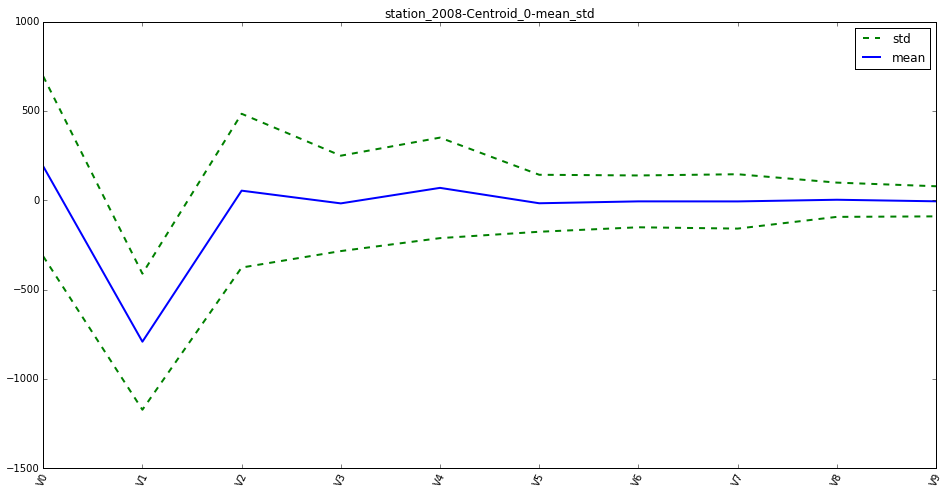

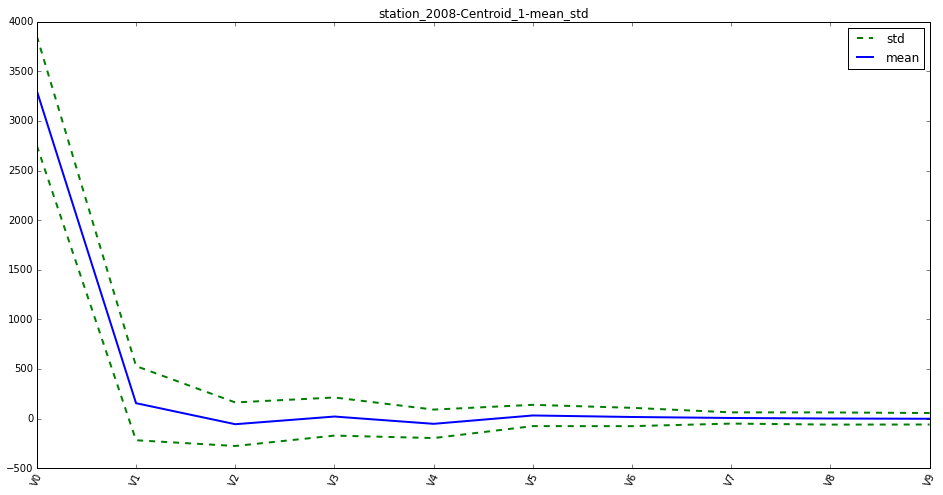

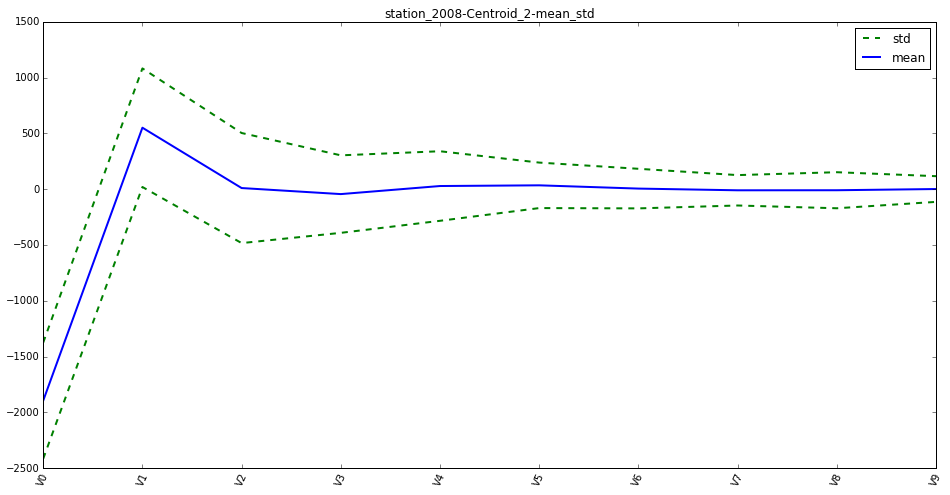

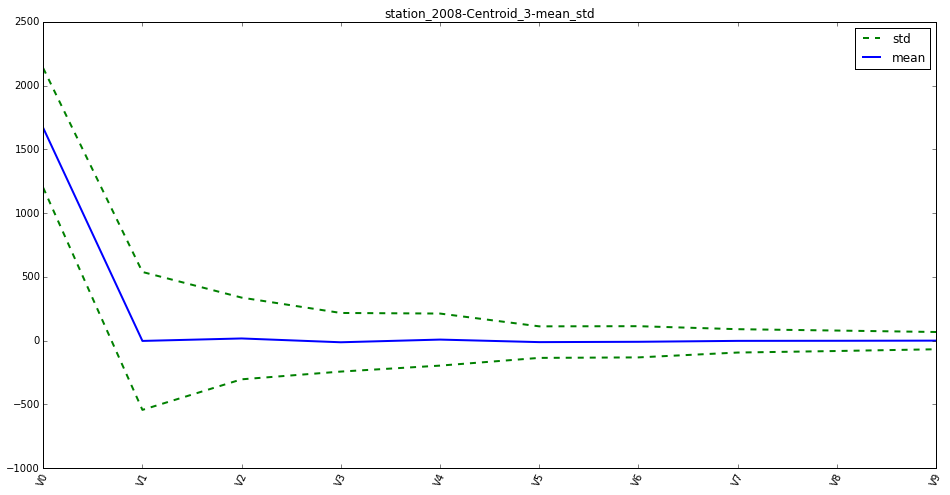

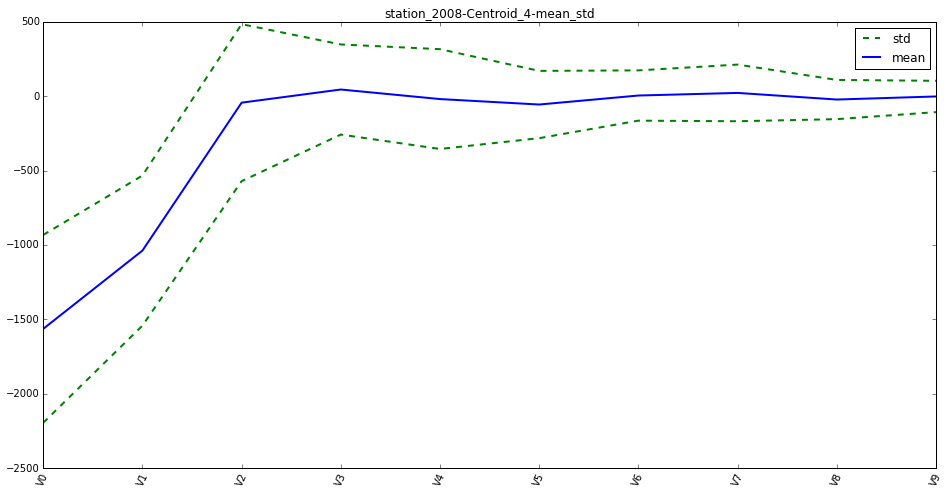

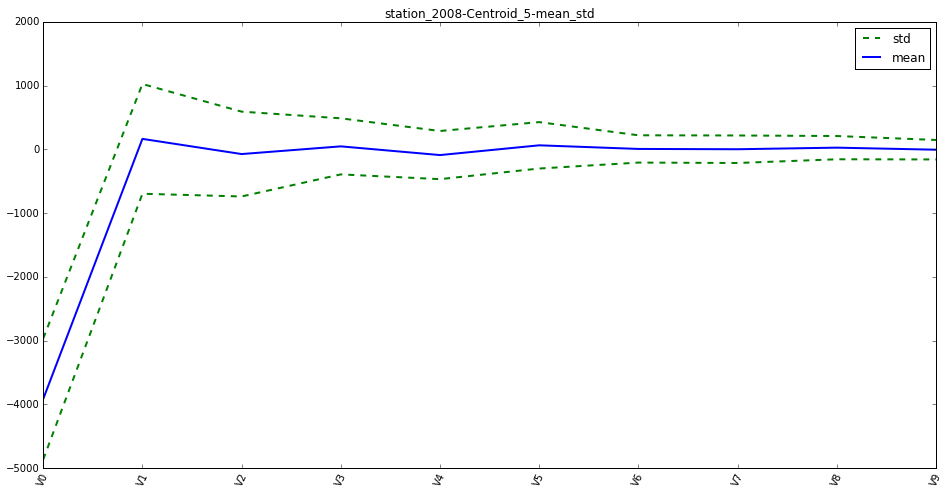

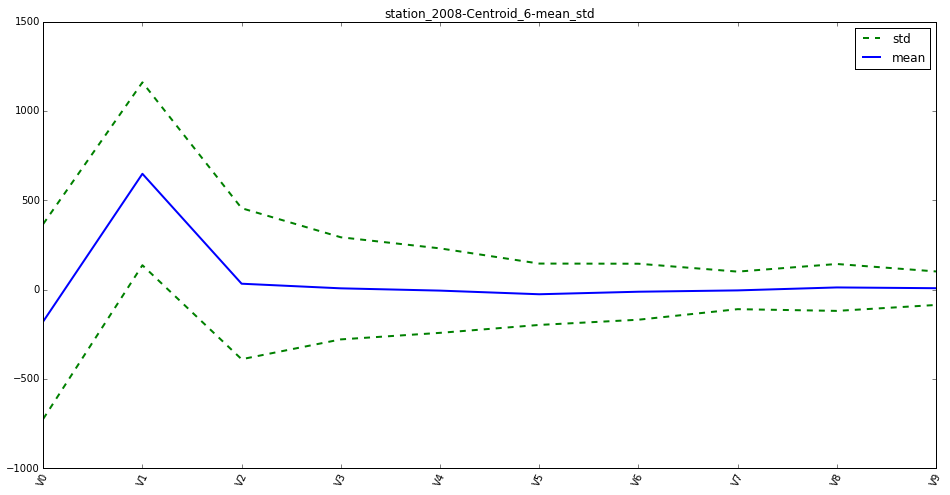

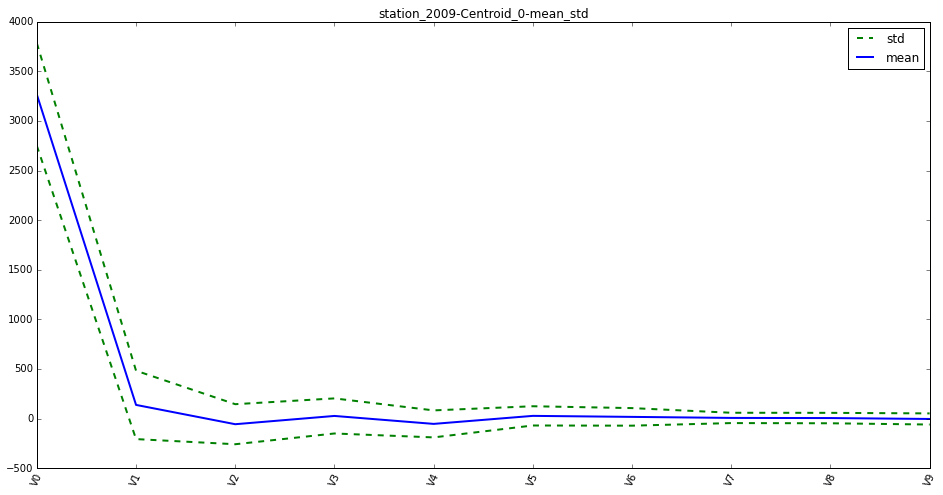

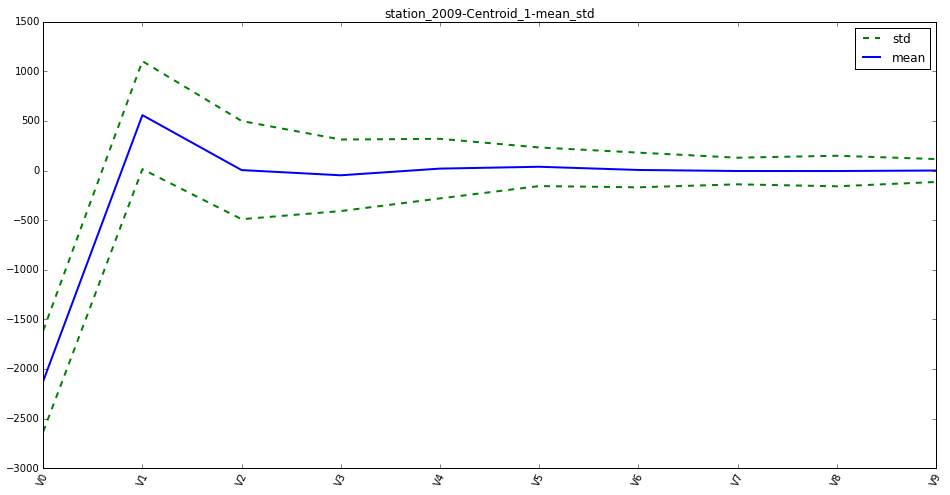

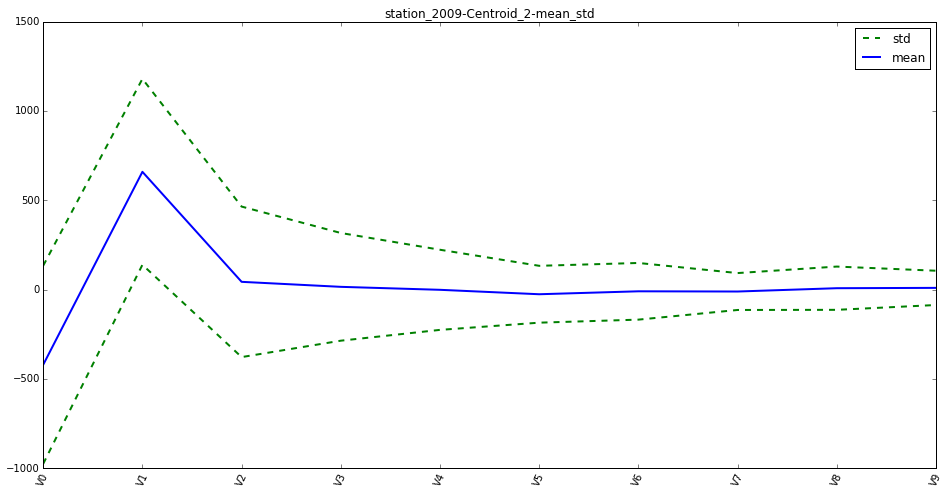

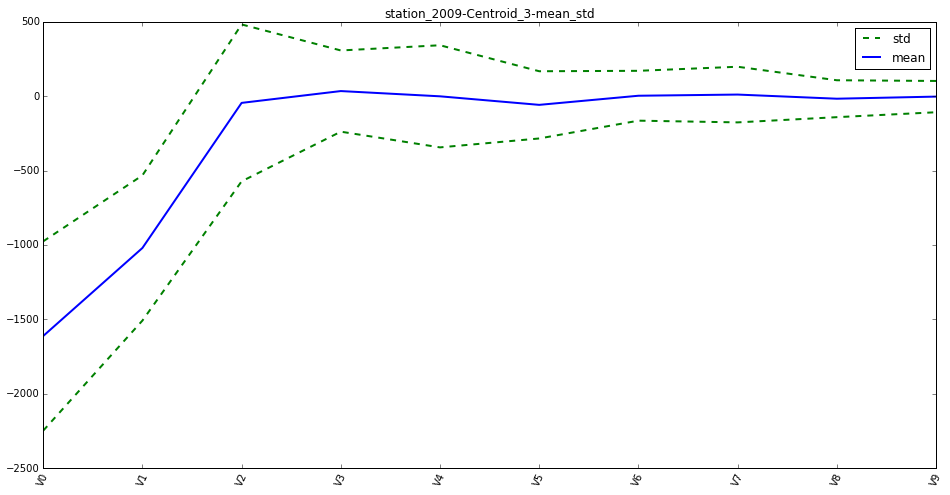

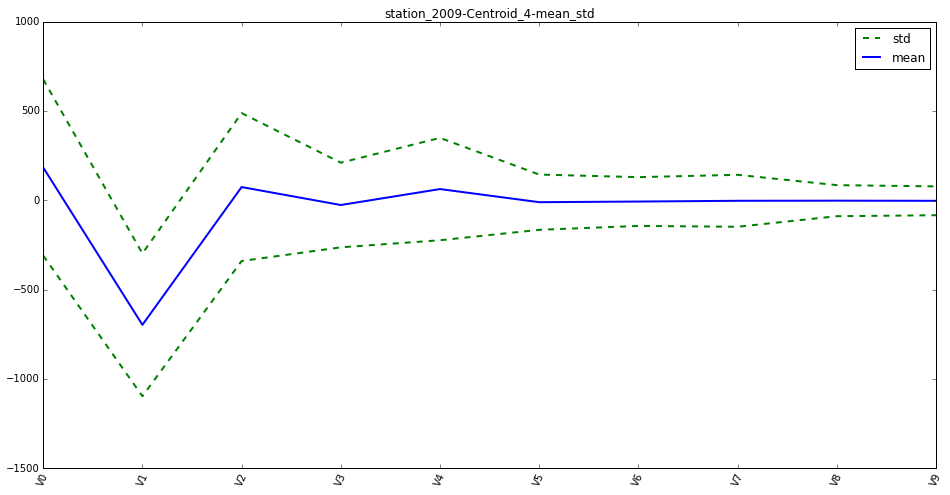

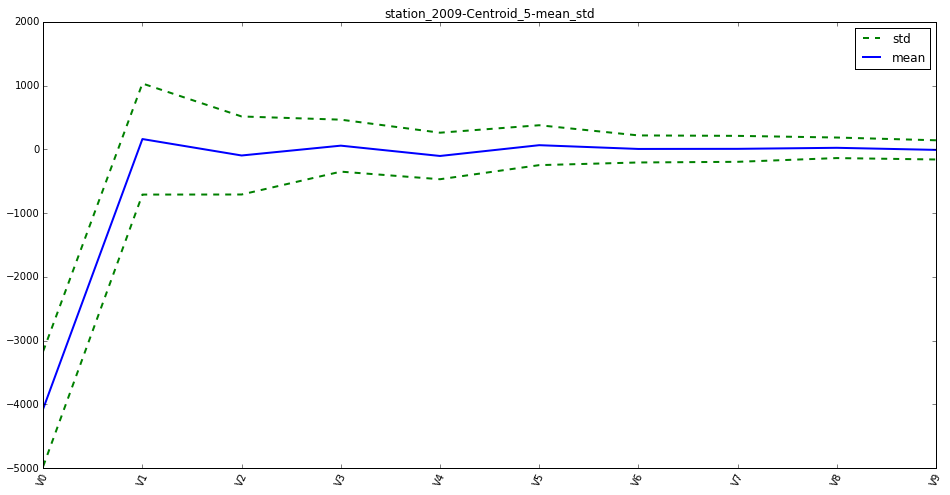

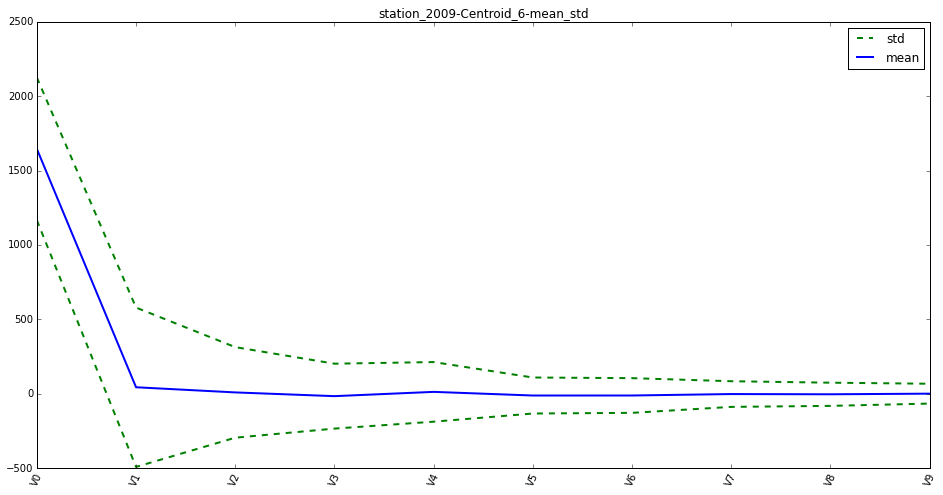

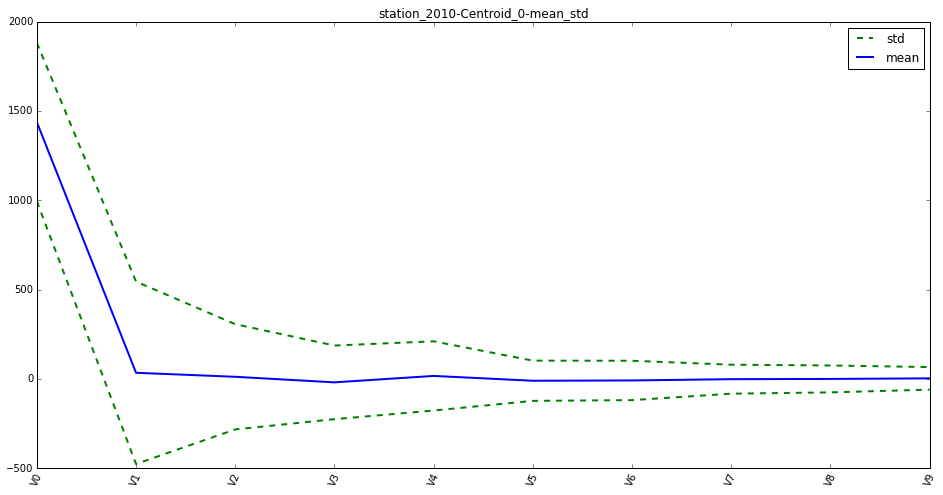

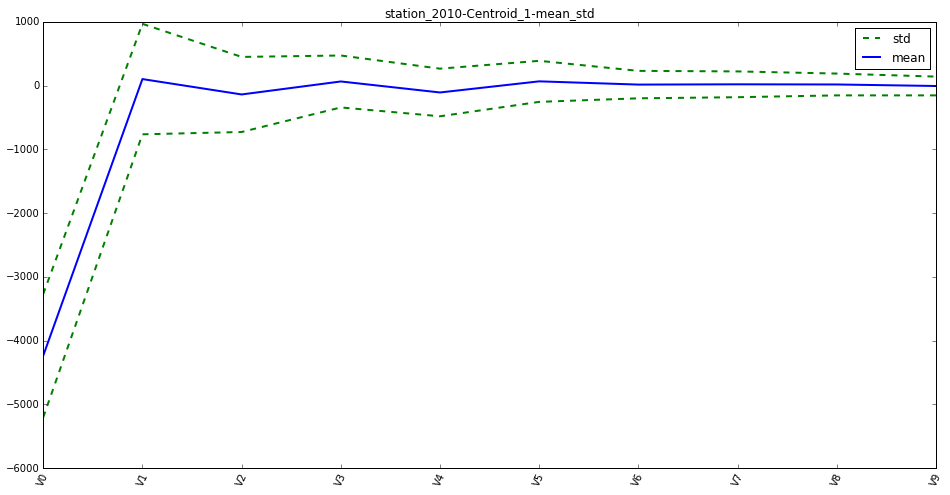

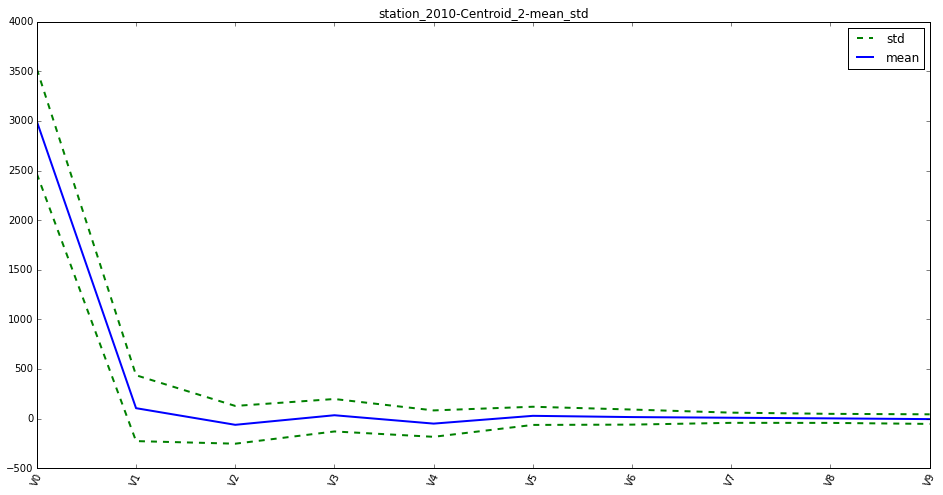

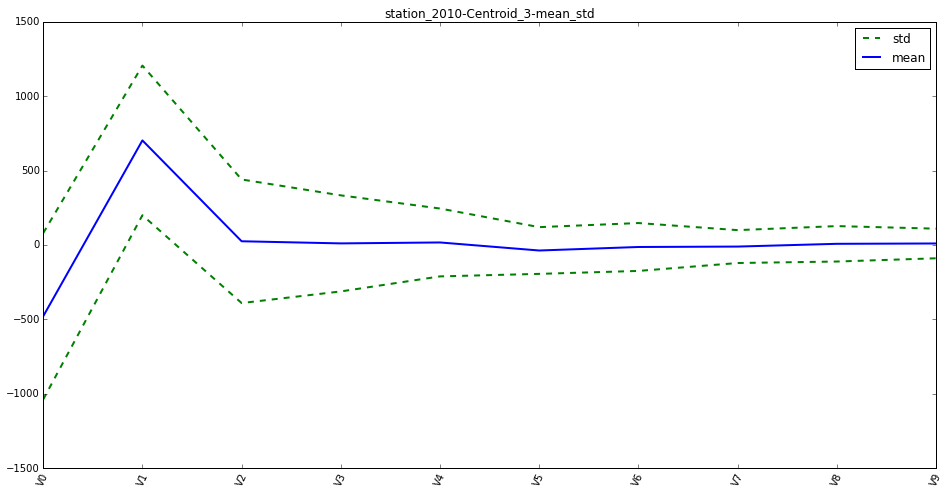

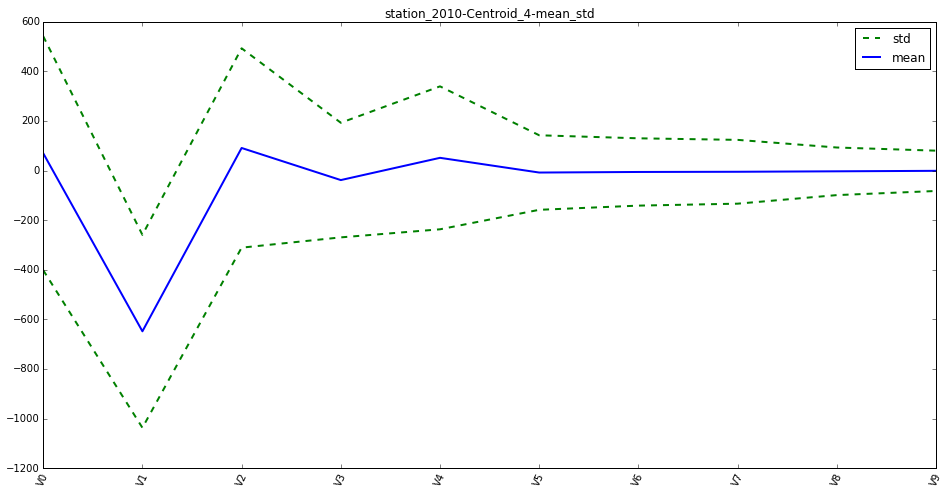

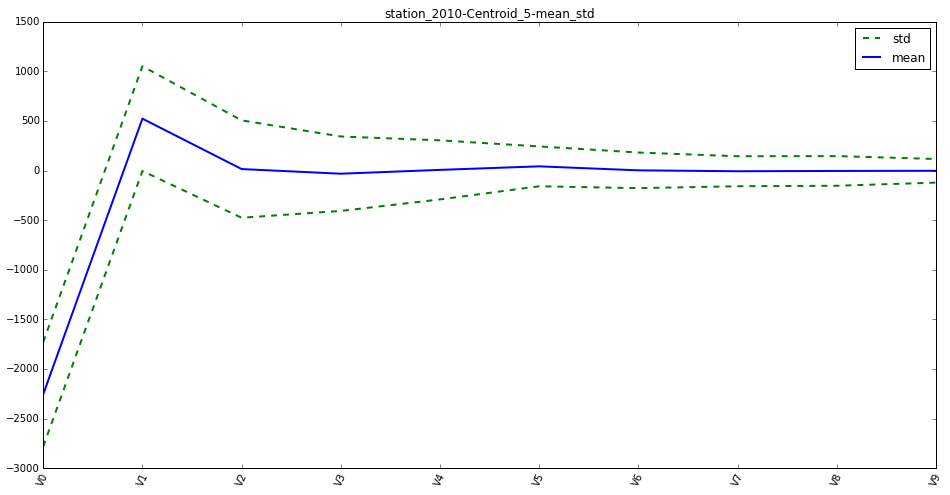

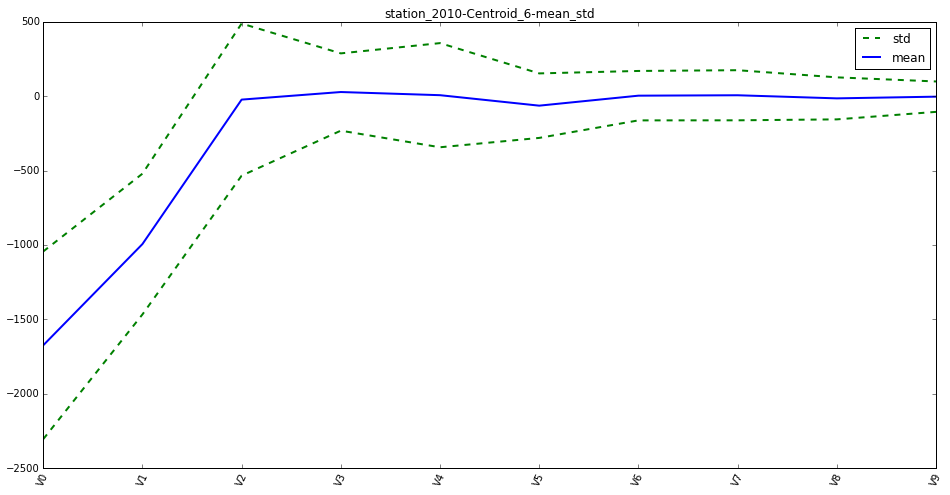

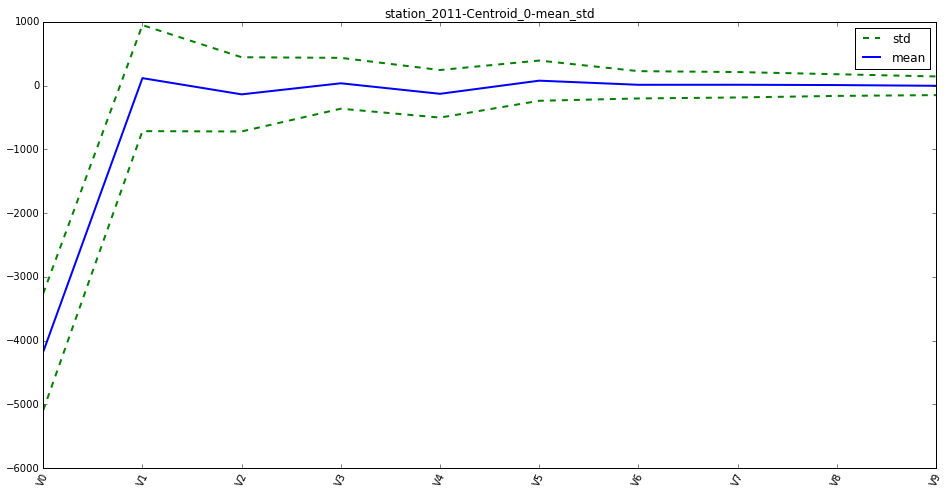

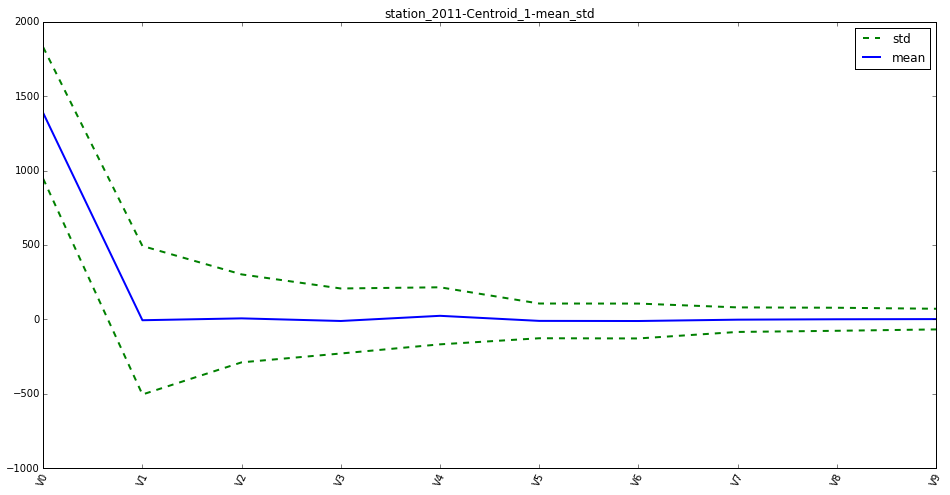

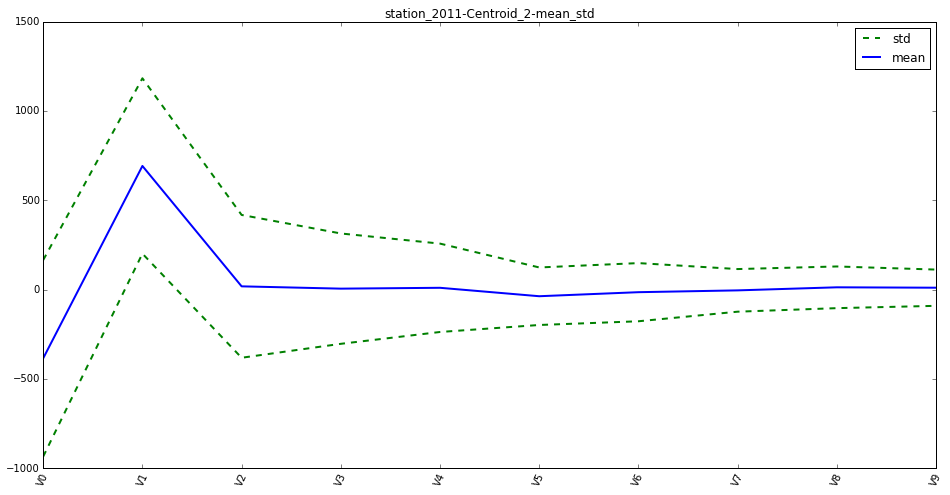

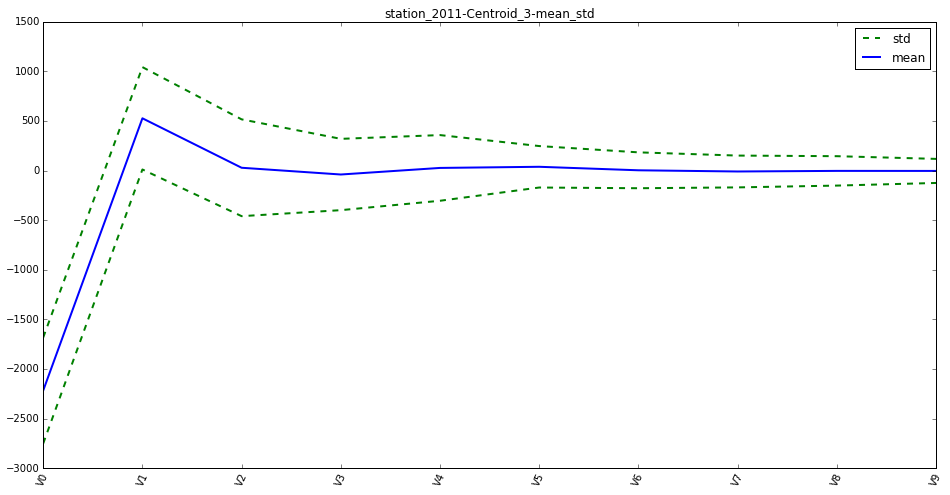

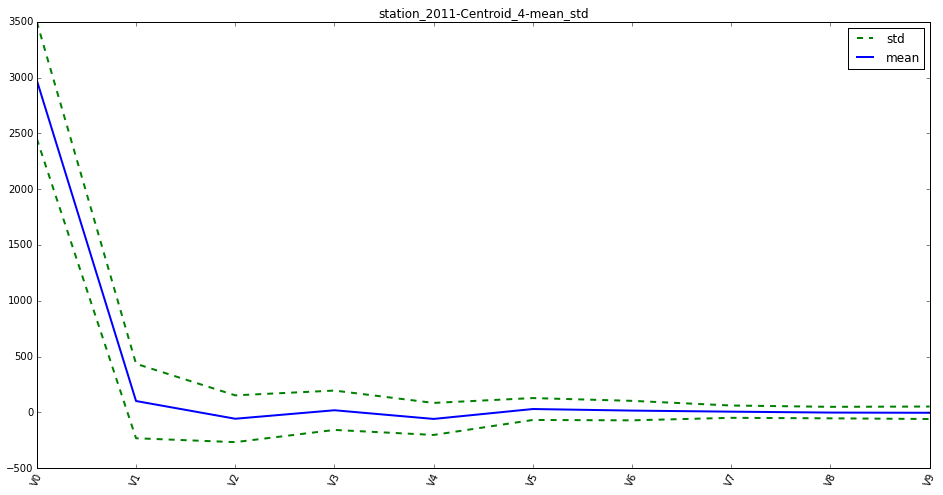

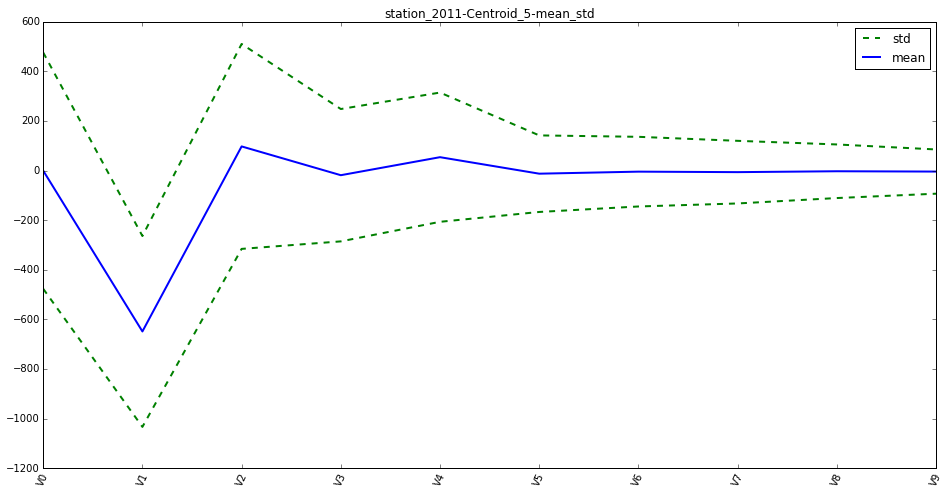

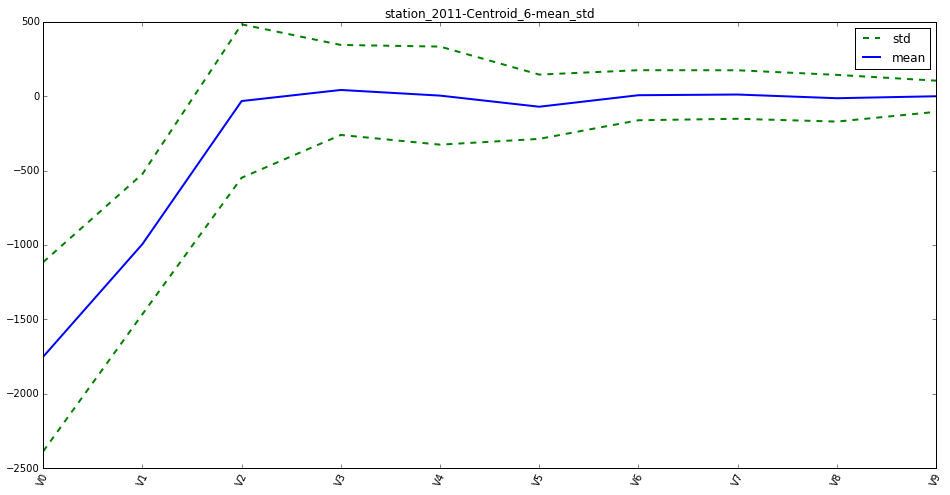

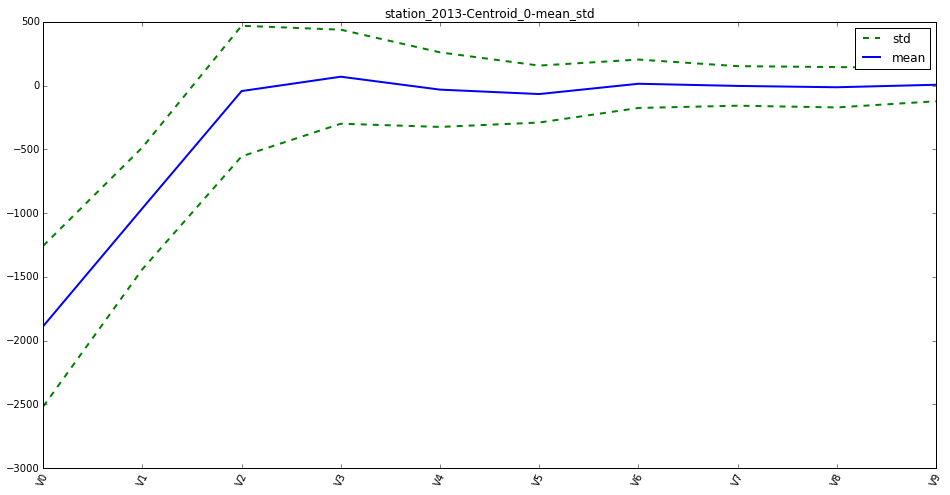

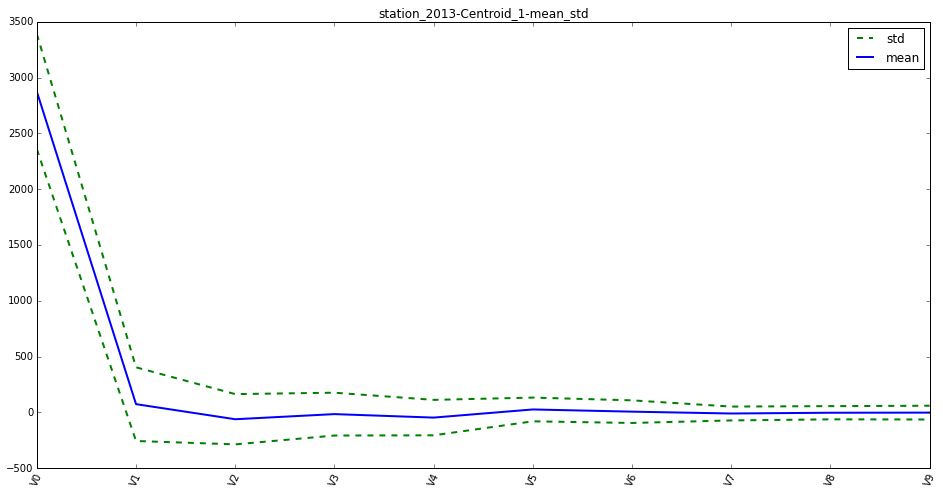

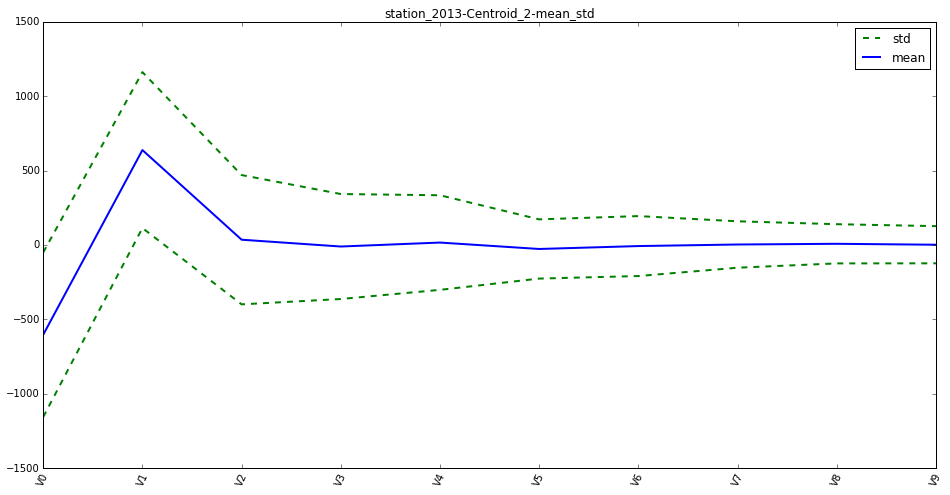

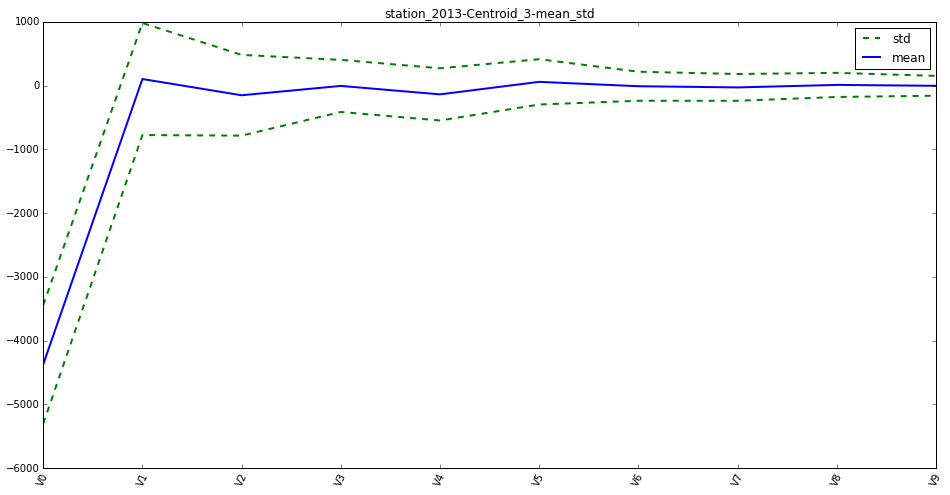

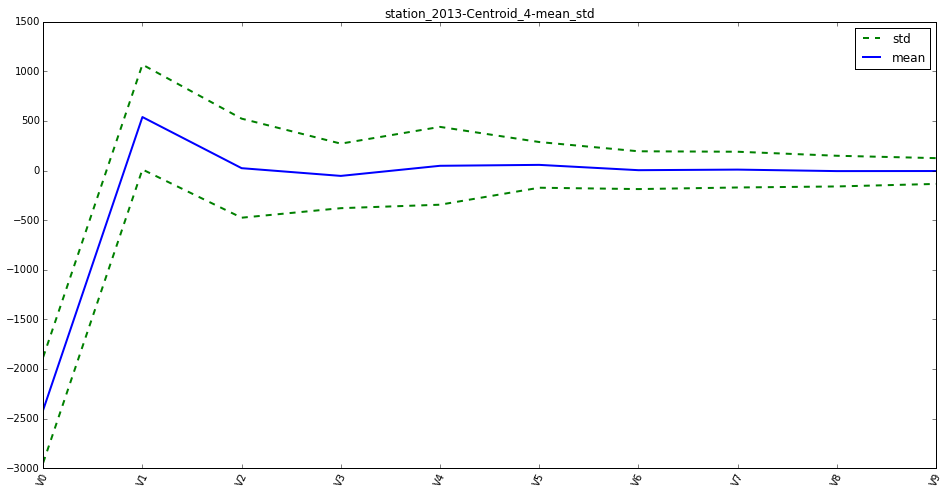

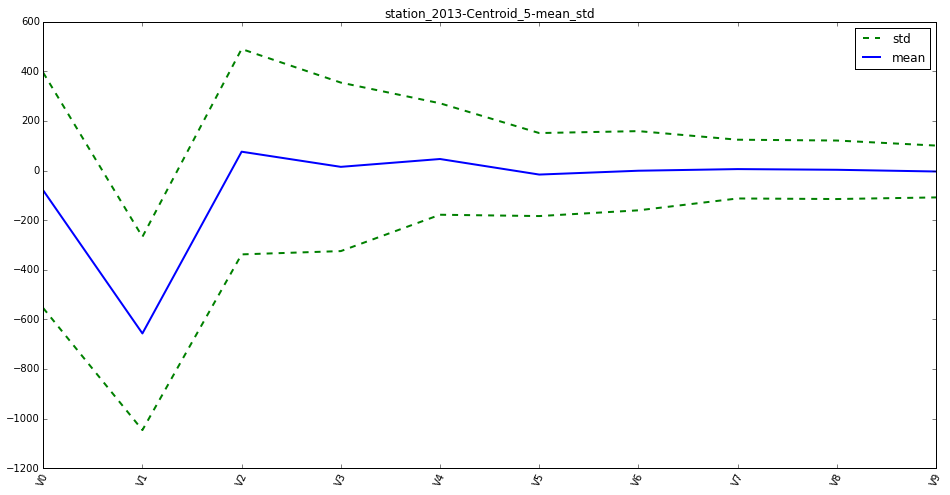

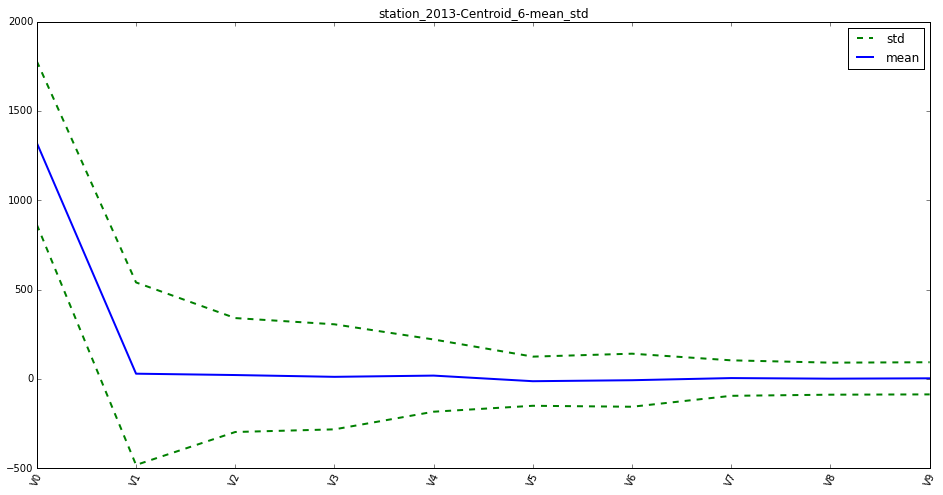

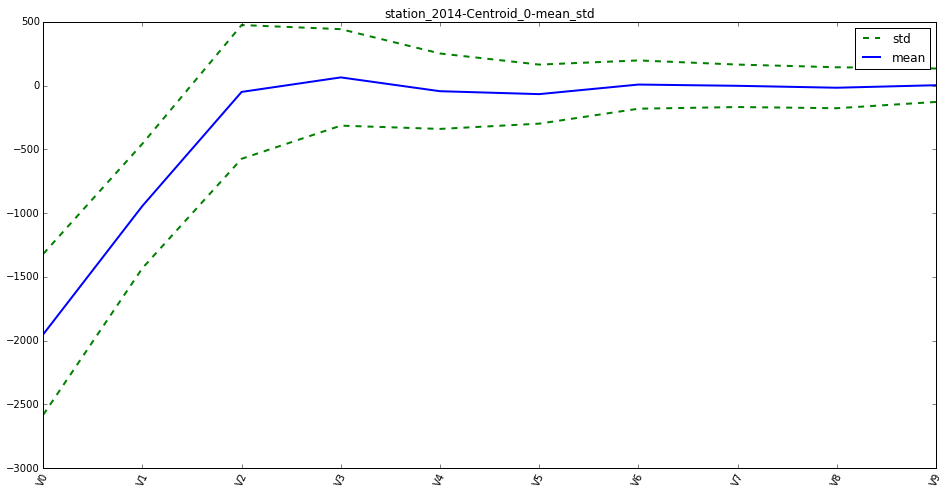

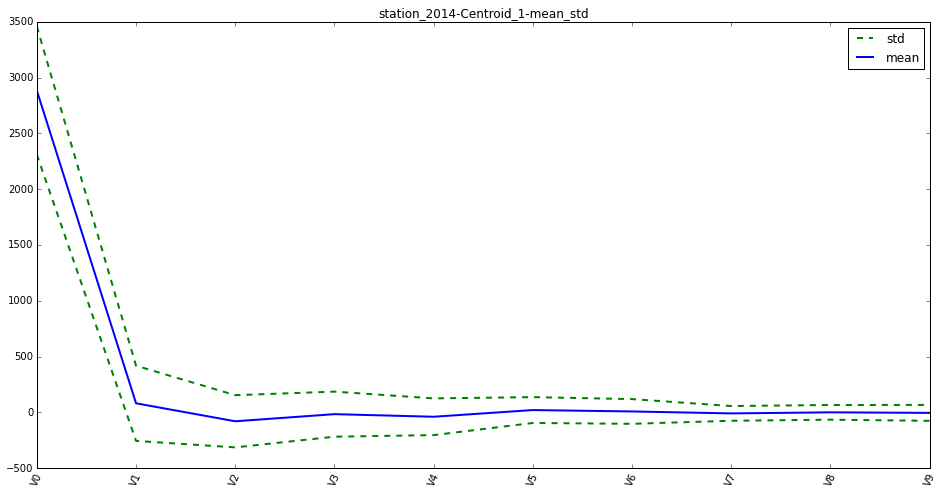

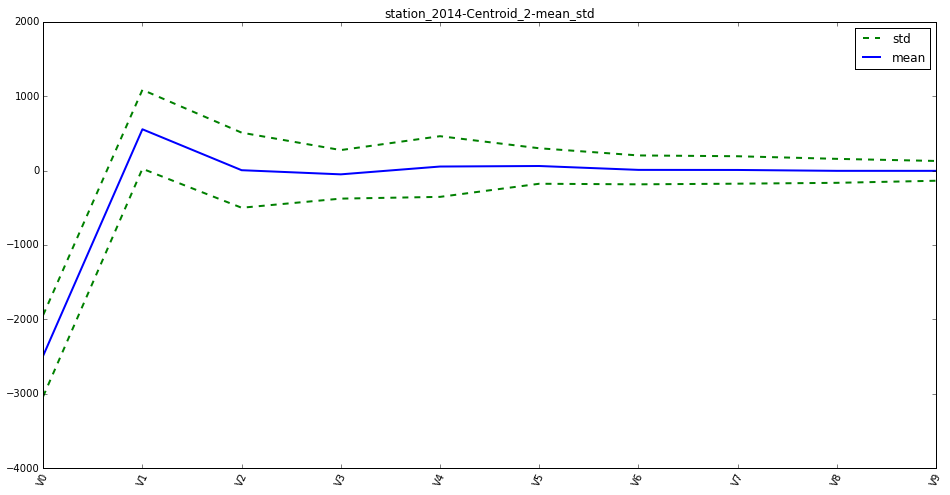

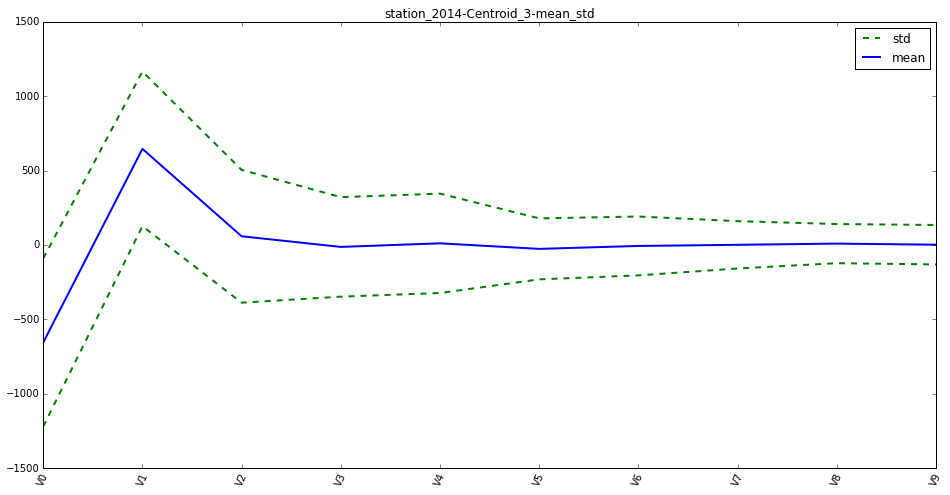

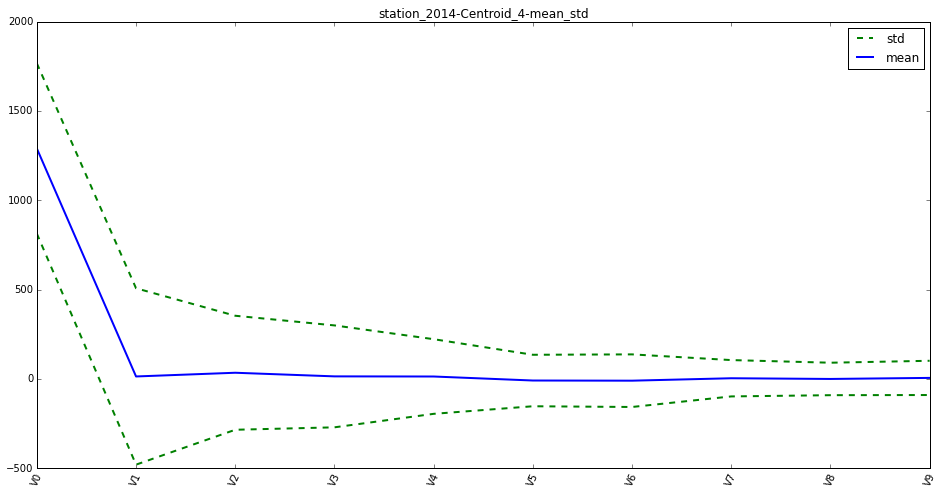

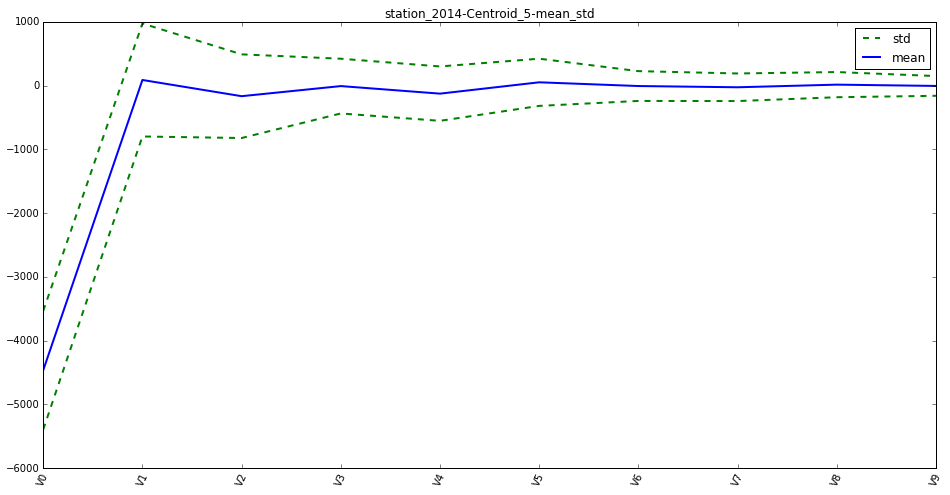

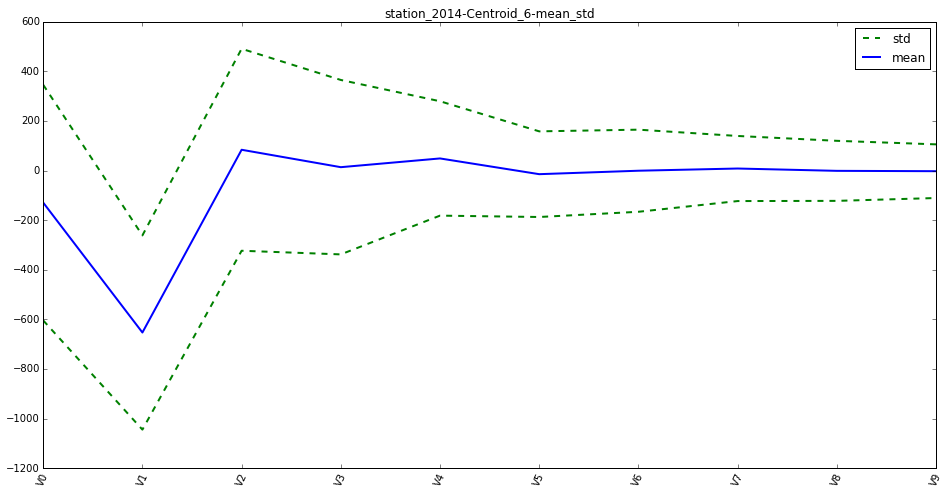

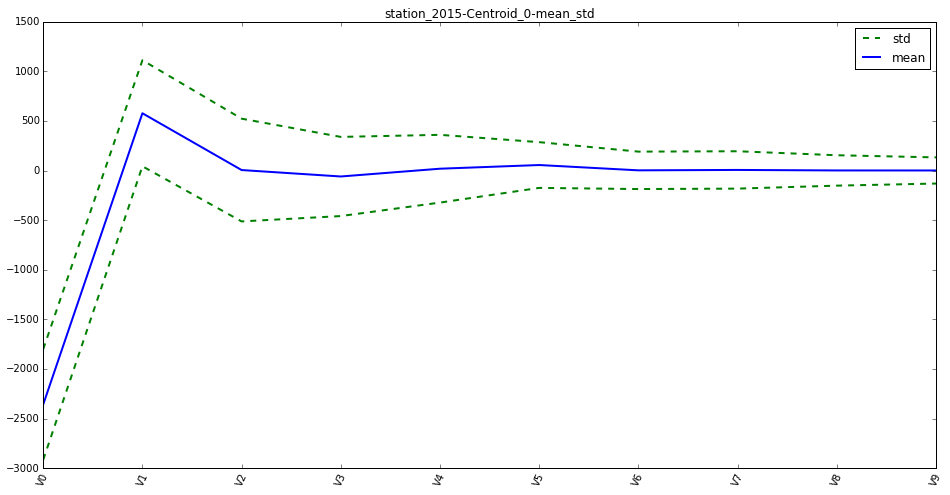

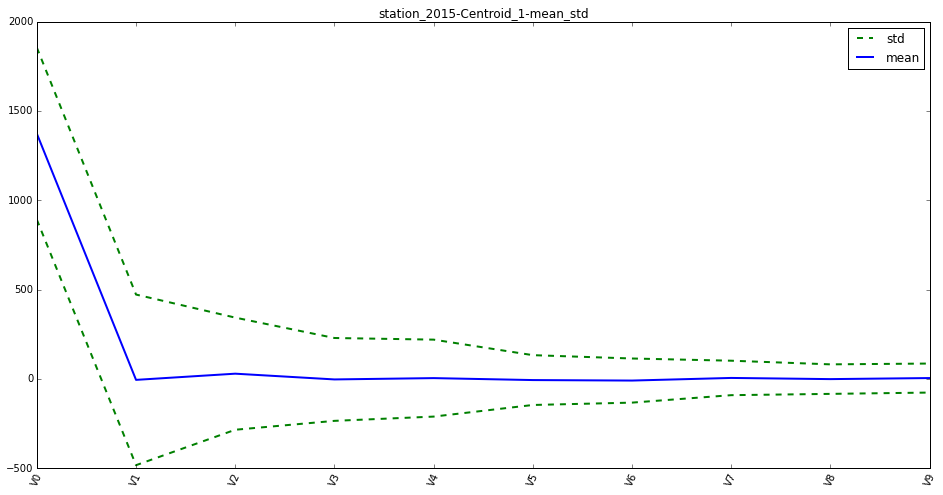

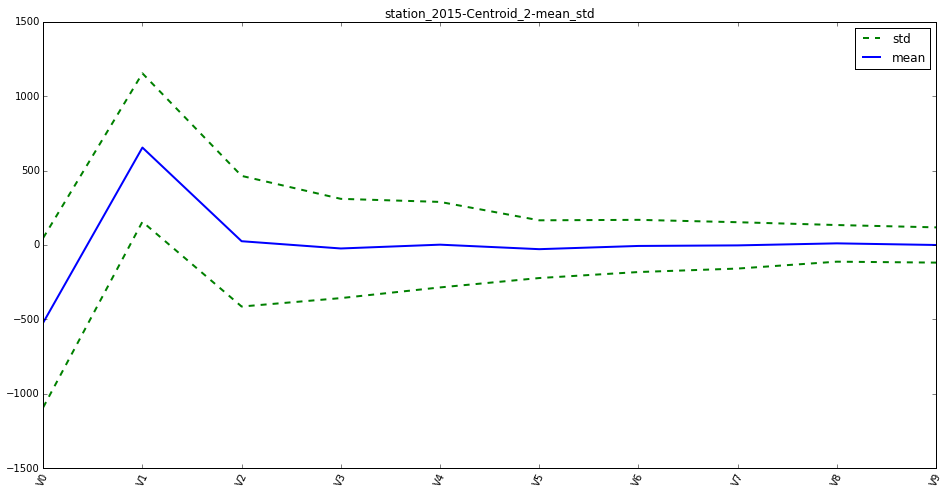

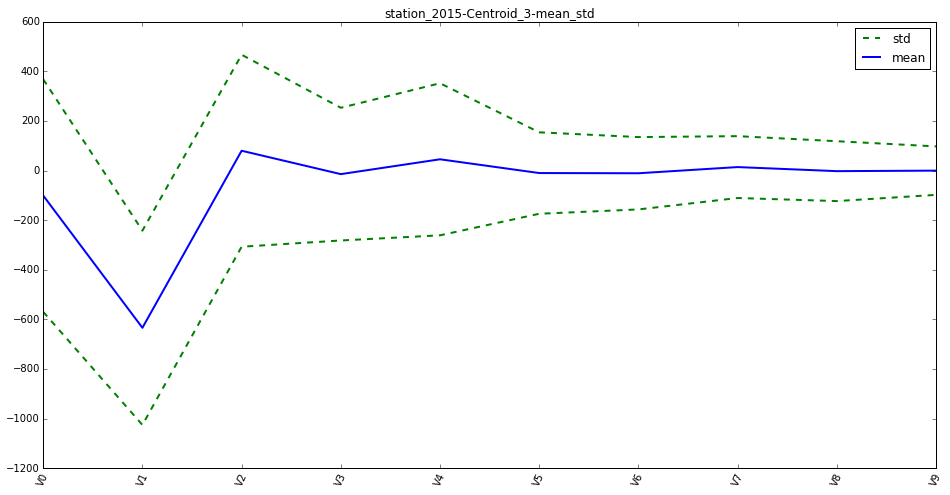

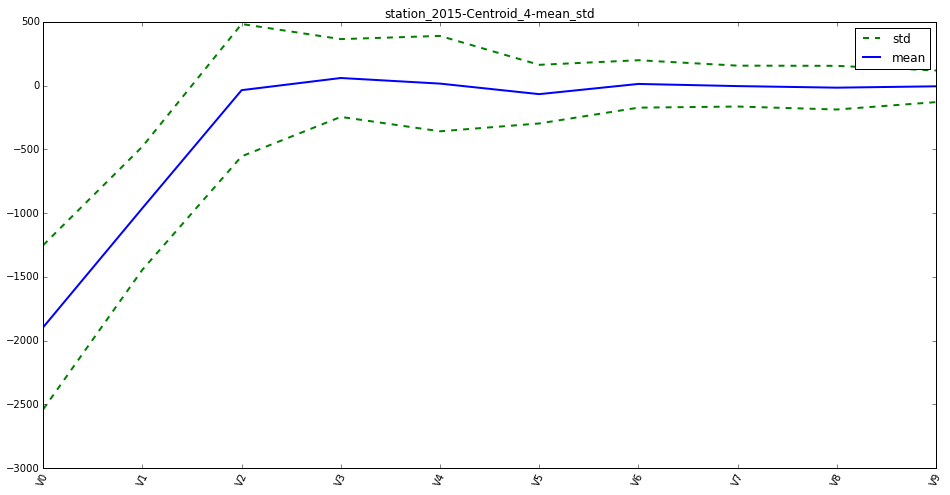

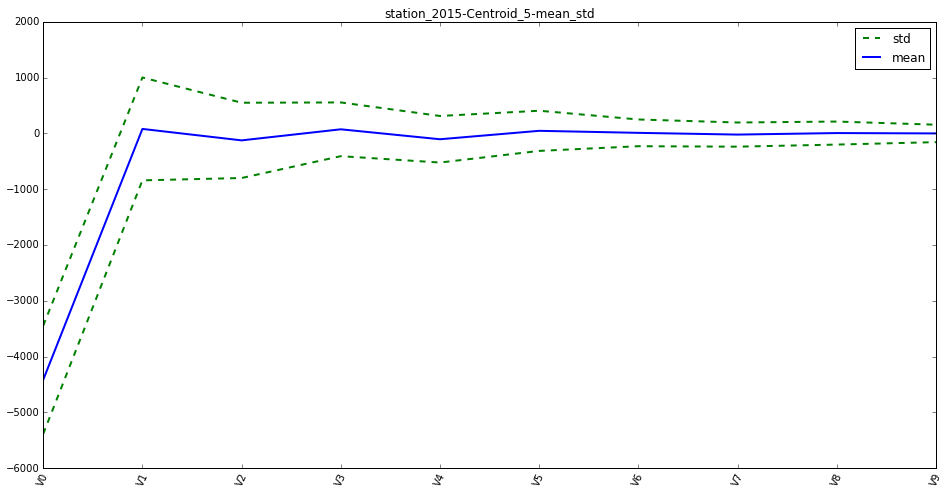

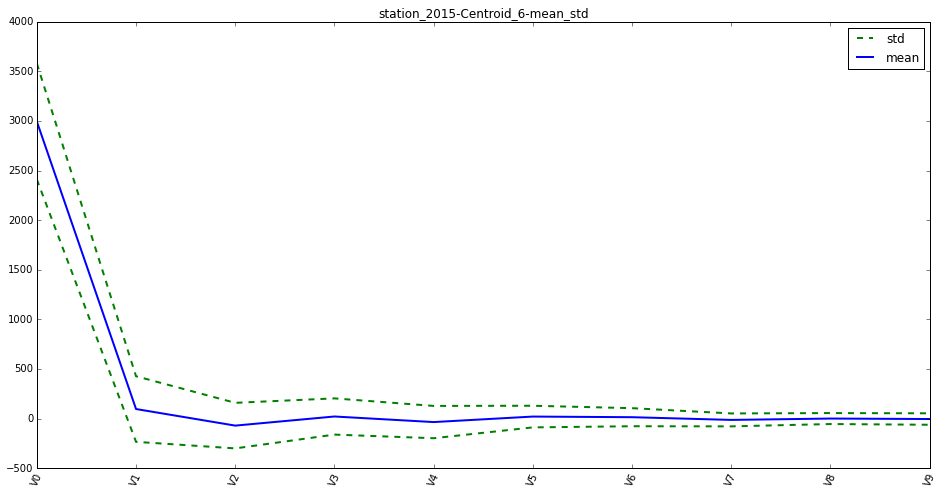

In [6]:
run_entries= [
    ('/home/dyerke/Documents/DSE/capstone_project/traffic/data/total_flow_transformed.pivot_2008_grouping_pca_transform_tmp.csv', 'station_2008'),
    ('/home/dyerke/Documents/DSE/capstone_project/traffic/data/total_flow_transformed.pivot_2009_grouping_pca_transform_tmp.csv', 'station_2009'),
    ('/home/dyerke/Documents/DSE/capstone_project/traffic/data/total_flow_transformed.pivot_2010_grouping_pca_transform_tmp.csv', 'station_2010'),
    ('/home/dyerke/Documents/DSE/capstone_project/traffic/data/total_flow_transformed.pivot_2011_grouping_pca_transform_tmp.csv', 'station_2011'),
    ('/home/dyerke/Documents/DSE/capstone_project/traffic/data/total_flow_transformed.pivot_2013_grouping_pca_transform_tmp.csv', 'station_2013'),
    ('/home/dyerke/Documents/DSE/capstone_project/traffic/data/total_flow_transformed.pivot_2014_grouping_pca_transform_tmp.csv', 'station_2014'),
    ('/home/dyerke/Documents/DSE/capstone_project/traffic/data/total_flow_transformed.pivot_2015_grouping_pca_transform_tmp.csv', 'station_2015')
]
# run_entries= [
#     ('/home/dyerke/Documents/DSE/capstone_project/traffic/data/total_flow_transformed.pivot_2008_grouping_pca_transform_tmp.csv', 'station_2008')
# ]
n_clusters=7
for m_entry in run_entries:
    filename= m_entry[0]
    token_label= m_entry[1]
    #
    print('Processing {}'.format(token_label))
    #
    df= pd.read_csv(filename, header=None)
    df_arr= df[[i for i in xrange(6, 16)]].values
    
    #     n= len(df_arr)
    #     from random import sample
    #     sample_size= int(float(n) * 0.05)
    #     idx=np.array(sample(xrange(n),sample_size))
    
    execute_kmeans(df_arr, n_clusters, token_label)